# DECISION_TREE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("olx_new_data.csv")
data

,Property type,Bedroom,Bathroom,Furnished Status,Carpet Area,Construction Status,Floor No,SquareFeet,Facing,Car Parking,Total Price (INR),Address,BHK,City,State
0,Apartments,1.0,1.0,Unfurnished,540.0,Ready to Move,30.0,650.0,East,1.0,15200000.0,"Teen Hath Naka, Thane, Maharashtra",1.0,Thane,Maharashtra
1,Houses & Villas,4.0,NaN,Unfurnished,1800.0,Ready to Move,2.0,1800.0,South,1.0,9200000.0,"Beltarodi, Nagpur, Maharashtra",NaN,Nagpur,Maharashtra
2,Houses & Villas,4.0,4.0,Semi-Furnished,1032.0,Ready to Move,1.0,1632.0,East,2.0,8500000.0,"Railway Staff Colony, Jatani, Odisha",4.0,Jatani,Odisha
3,Apartments,2.0,3.0,Furnished,880.0,Ready to Move,7.0,975.0,West,1.0,6700000.0,"Chandkheda, Ahmedabad, Gujarat",2.0,Ahmedabad,Gujarat
4,Houses & Villas,3.0,3.0,Semi-Furnished,1400.0,Ready to Move,1.0,3000.0,West,1.0,7000000.0,"Civil Lines, Nagpur, Maharashtra",3.0,Nagpur,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,Apartments,2.0,1.0,Furnished,780.0,New Launch,5.0,850.0,East,0.0,2200000.0,"Maulviganj, Lucknow, Uttar Pradesh",2.0,Lucknow,Uttar Pradesh
3006,Builder Floors,3.0,2.0,NaN,900.0,Ready to Move,4.0,1000.0,NaN,NaN,8500000.0,"Rohini Sector 2, Delhi, Delhi",3.0,Delhi,Delhi
3007,Apartments,2.0,2.0,Unfurnished,780.0,Under Construction,37.0,1000.0,East,1.0,12000000.0,"Panvel, Navi Mumbai, Maharashtra",2.0,Navi Mumbai,Maharashtra
3008,Houses & Villas,3.0,2.0,Unfurnished,650.0,Under Construction,NaN,1000.0,East,NaN,7000000.0,"Indira Nagar, Lucknow, Uttar Pradesh",3.0,Lucknow,Uttar Pradesh


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property type        2988 non-null   object 
 1   Bedroom              2868 non-null   float64
 2   Bathroom             2869 non-null   float64
 3   Furnished Status     2854 non-null   object 
 4   Carpet Area          2988 non-null   float64
 5   Construction Status  2856 non-null   object 
 6   Floor No             2736 non-null   float64
 7   SquareFeet           2988 non-null   float64
 8   Facing               2519 non-null   object 
 9   Car Parking          2567 non-null   float64
 10  Total Price (INR)    2997 non-null   float64
 11  Address              2987 non-null   object 
 12  BHK                  2848 non-null   float64
 13  City                 2983 non-null   object 
 14  State                2983 non-null   object 
dtypes: float64(8), object(7)
memory usage:

In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2262 entries, 0 to 3009
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property type        2262 non-null   object 
 1   Bedroom              2262 non-null   float64
 2   Bathroom             2262 non-null   float64
 3   Furnished Status     2262 non-null   object 
 4   Carpet Area          2262 non-null   float64
 5   Construction Status  2262 non-null   object 
 6   Floor No             2262 non-null   float64
 7   SquareFeet           2262 non-null   float64
 8   Facing               2262 non-null   object 
 9   Car Parking          2262 non-null   float64
 10  Total Price (INR)    2262 non-null   float64
 11  Address              2262 non-null   object 
 12  BHK                  2262 non-null   float64
 13  City                 2262 non-null   object 
 14  State                2262 non-null   object 
dtypes: float64(8), object(7)
memory usage: 282.

In [6]:
data.drop(columns = 'Address',inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2262 entries, 0 to 3009
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property type        2262 non-null   int32  
 1   Bedroom              2262 non-null   float64
 2   Bathroom             2262 non-null   float64
 3   Furnished Status     2262 non-null   int32  
 4   Carpet Area          2262 non-null   float64
 5   Construction Status  2262 non-null   int32  
 6   Floor No             2262 non-null   float64
 7   SquareFeet           2262 non-null   float64
 8   Facing               2262 non-null   int32  
 9   Car Parking          2262 non-null   float64
 10  Total Price (INR)    2262 non-null   float64
 11  BHK                  2262 non-null   float64
 12  City                 2262 non-null   int32  
 13  State                2262 non-null   int32  
dtypes: float64(8), int32(6)
memory usage: 212.1 KB


In [9]:
from sklearn.model_selection import train_test_split
X =data.drop(['Property type'],axis=1)
y = data['Property type'] 

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [11]:
train_data = X_train.join(y_train)
train_data

,Bedroom,Bathroom,Furnished Status,Carpet Area,Construction Status,Floor No,SquareFeet,Facing,Car Parking,Total Price (INR),BHK,City,State,Property type
1287,3.0,3.0,0,1404.0,1,4.0,2160.0,1,1.0,15000000.0,3.0,0,1,0
1440,2.0,2.0,1,650.0,1,33.0,1000.0,0,1.0,12900000.0,2.0,24,3,0
2915,1.0,1.0,1,290.0,2,4.0,350.0,5,0.0,1155000.0,1.0,13,6,0
1434,2.0,2.0,1,950.0,1,5.0,3000.0,4,3.0,4500000.0,2.0,18,3,0
803,2.0,2.0,1,557.0,2,6.0,697.0,2,0.0,2718000.0,2.0,13,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,1.0,1.0,2,425.0,1,7.0,615.0,0,1.0,4100000.0,1.0,20,3,0
356,4.0,3.0,1,500.0,1,3.0,1600.0,0,0.0,7000000.0,4.0,15,5,3
2833,2.0,2.0,1,900.0,1,4.0,900.0,4,1.0,5000000.0,2.0,13,6,0
525,2.0,2.0,1,1200.0,1,2.0,1450.0,0,1.0,4950000.0,2.0,15,5,3


array([[<Axes: title={'center': 'Bedroom'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Furnished Status'}>,
        <Axes: title={'center': 'Carpet Area'}>],
       [<Axes: title={'center': 'Construction Status'}>,
        <Axes: title={'center': 'Floor No'}>,
        <Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Facing'}>],
       [<Axes: title={'center': 'Car Parking'}>,
        <Axes: title={'center': 'Total Price (INR)'}>,
        <Axes: title={'center': 'BHK'}>,
        <Axes: title={'center': 'City'}>],
       [<Axes: title={'center': 'State'}>,
        <Axes: title={'center': 'Property type'}>, <Axes: >, <Axes: >]],
      dtype=object)

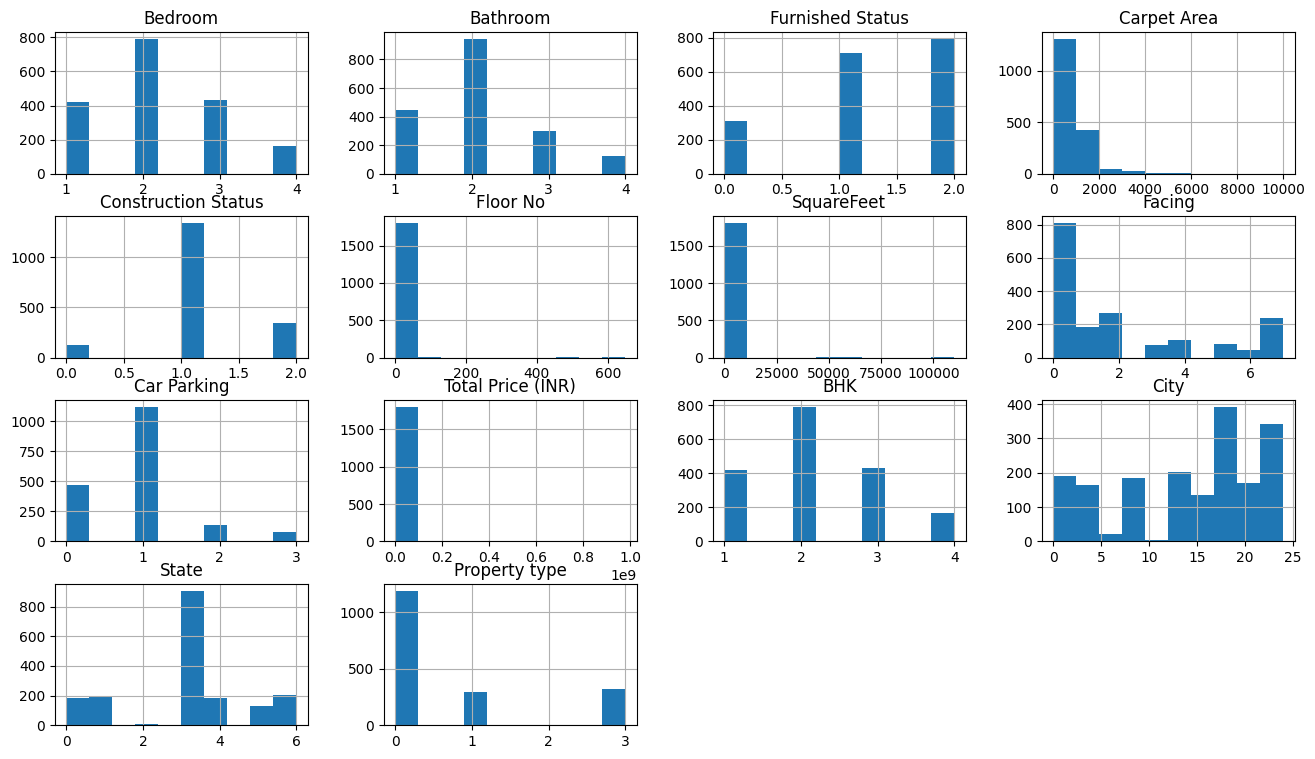

In [12]:
train_data.hist(figsize=(16,9))

<Axes: >

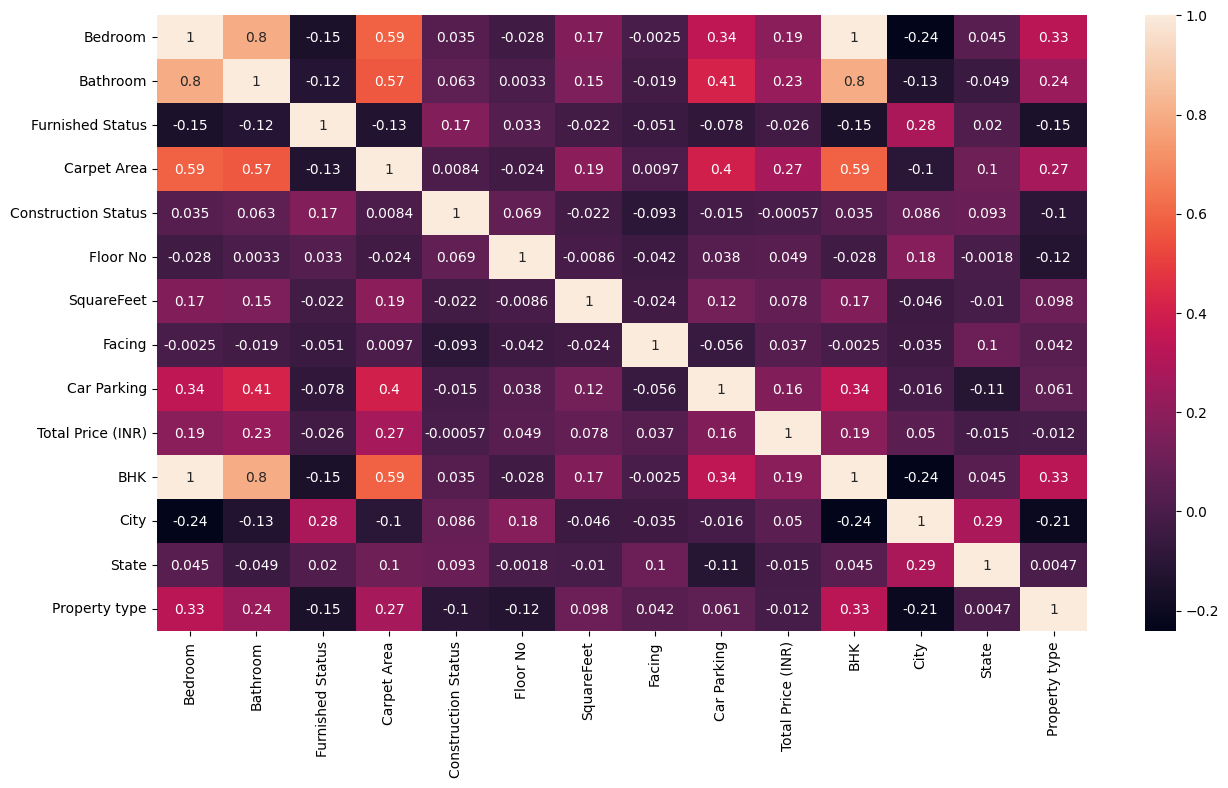

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True)

In [14]:
test_data = X_test.join(y_test)

In [16]:
X_test,y_test = test_data.drop(['Property type'],axis=1),test_data['Property type']

In [17]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print("=======Train Result===========")
        print(f'Accuracy Score=> {accuracy_score(y_train,y_pred) *100:.2f}%')
    elif train==False:
        pred = clf.predict(x_test)
        print("=======Test Result============")
        print(f'Accuracy Score=> {accuracy_score(y_test,pred) *100:.2f}%')
        
        print('\n \n Classification Report=>\n',classification_report(y_test,pred,digits=2))
        

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report


clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
metric_score(clf,X_train,X_test,y_train,y_test,train = True)
metric_score(clf,X_train,X_test,y_train,y_test,train = False)


=======Train Result===========
Accuracy Score=> 99.83%
=======Test Result============
Accuracy Score=> 81.90%

 
 Classification Report=>
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       295
           1       0.61      0.57      0.59        77
           2       1.00      0.40      0.57         5
           3       0.74      0.84      0.79        76

    accuracy                           0.82       453
   macro avg       0.81      0.67      0.71       453
weighted avg       0.82      0.82      0.82       453



In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,6),
    'min_samples_split':range(3,8),
    'max_leaf_nodes':range(5,15)
}

In [23]:
gridsearch = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [25]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 15),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [42]:
best_parm = gridsearch.best_params_


In [39]:
clf = DecisionTreeClassifier( criterion= 'gini',
 max_depth= 25,
 max_leaf_nodes= 40,
 min_samples_leaf= 8,
 min_samples_split= 9)

In [40]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=25, max_leaf_nodes=40, min_samples_leaf=8,
                       min_samples_split=9)

In [41]:
metric_score(clf,X_train,X_test,y_train,y_test,train = True)
metric_score(clf,X_train,X_test,y_train,y_test,train = False)

=======Train Result===========
Accuracy Score=> 87.73%
=======Test Result============
Accuracy Score=> 85.65%

 
 Classification Report=>
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       295
           1       0.89      0.51      0.64        77
           2       0.00      0.00      0.00         5
           3       0.77      0.86      0.81        76

    accuracy                           0.86       453
   macro avg       0.63      0.58      0.59       453
weighted avg       0.85      0.86      0.84       453



C:\Users\SUBRAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SUBRAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SUBRAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# XGBOOSTER

In [46]:
import xgboost as xgb

In [47]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [48]:
metric_score(clf,X_train,X_test,y_train,y_test,train = True)
metric_score(clf,X_train,X_test,y_train,y_test,train = False)


=======Train Result===========
Accuracy Score=> 87.73%
=======Test Result============
Accuracy Score=> 85.65%

 
 Classification Report=>
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       295
           1       0.89      0.51      0.64        77
           2       0.00      0.00      0.00         5
           3       0.77      0.86      0.81        76

    accuracy                           0.86       453
   macro avg       0.63      0.58      0.59       453
weighted avg       0.85      0.86      0.84       453



C:\Users\SUBRAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SUBRAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SUBRAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,